# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

## Ejercicio - Número de Nodos y Enlaces

(resuelva en código propio y usando la librería NerworkX o iGraph)

Cuente en número de nodos y enalces con los siguientes links (asumiendo que el grafo puede ser dirigido y no dirigido)


In [2]:
edges = set([(1, 2), (3, 1), (3, 2), (2, 4)])

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import itertools
import random

### Usando la libreria

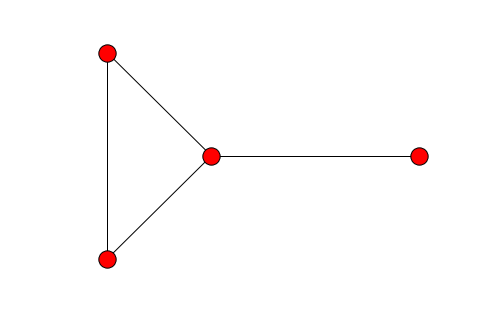

('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [3]:
gr = nx.Graph()
for i in range(1,5):
    gr.add_node(i)
for i in edges:
    gr.add_edge(i[0], i[1])
    
nx.draw_spectral(gr)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr))
if nx.is_directed(gr) is True:
    print ('Number of edges: ', gr.number_of_edges())
else:
    print ('Number of edges: ', gr.number_of_edges()*2)

print ('Number of nodes: ', gr.number_of_nodes())

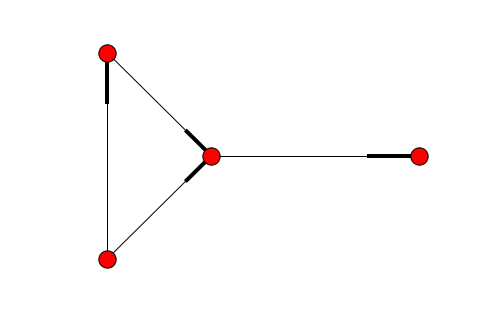

('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [4]:
gr2 = nx.DiGraph()
for i in range(1,5):
    gr2.add_node(i)
for i in edges:
    gr2.add_edge(i[0], i[1])

nx.draw_spectral(gr2)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr2))
if nx.is_directed(gr2) is True:
    print ('Number of edges: ', gr2.number_of_edges())
else:
    print ('Number of edges: ', gr2.number_of_edges()*2)

print ('Number of nodes: ', gr2.number_of_nodes())

### Propio

In [5]:
Directed=False
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))

('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [6]:
Directed=True
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))

('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [7]:
del temp, Directed

## Ejercicio - Matriz de Adyacencia

(resuelva en código propio y usando la librería NetworkX (python) o iGraph (R))

Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

### Usando Librería

In [8]:
A = nx.adjacency_matrix(gr)
print ('No Dirigida')
print(A)

No Dirigida
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [9]:
A = nx.adjacency_matrix(gr2)
print ('Dirigida')
print(A)

Dirigida
  (0, 1)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1


### Propia

In [10]:
def adjmat(ed, directed):
    if directed is True:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d2.append(i[1])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    else:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d1.append(i[1])
            temp_d2.append(i[1])
            temp_d2.append(i[0])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    return B

In [13]:
A2 = adjmat(edges, True)
print ('Dirigida')
print (A2)

Dirigida
  (1, 2)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1


In [14]:
A2 = adjmat(edges, False)
print ('No Dirigida')
print (A2)

No Dirigida
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (4, 2)	1


In [15]:
del A, A2, gr, gr2

## Ejercicio - Sparseness 


### Enron email network  - Directed  http://snap.stanford.edu/data/email-Enron.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [16]:
F = open("Email-Enron.txt",'r')
Net1=nx.read_edgelist(F)
F.close()

In [99]:
n = Net1.number_of_nodes()
posibles = Net1.number_of_nodes()*(Net1.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net1.number_of_edges()/posibles)

('Ratio: ', 0.00027309755503535)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [18]:
ANet1 = nx.adjacency_matrix(Net1)

In [19]:
nzeros=Net1.number_of_nodes()*Net1.number_of_nodes()-len(ANet1.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 1345935202, ' ceros')


In [21]:
del Net1, posibles, ANet1, nzeros

NameError: name 'Net1' is not defined

###  Social circles from Facebook (anonymized) - Undirected http://snap.stanford.edu/data/egonets-Facebook.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [22]:
F = open("facebook_combined.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [23]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 0.010819963503439287)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [24]:
ANet = nx.adjacency_matrix(Net)

In [25]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 16137053, ' ceros')


In [26]:
del Net, n, posibles, ANet, nzeros

###   Webgraph from the Google programming contest, 2002 - Directed   http://snap.stanford.edu/data/web-Google.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [27]:
F = open("web-Google.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [29]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 1.1271891119695635e-05)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [30]:
ANet = nx.adjacency_matrix(Net)

In [31]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 766864614267, ' ceros')


In [33]:
del Net, n, posibles, ANet, nzeros

NameError: name 'Net' is not defined

## Ejercicio - Redes Bipartitas
Defina una red bipartita y genere ambas proyecciones, explique qué son los nodos y links tanto de la red original como de las proyeccciones

Se define una red donde los nodes E1, E2 y E3 son Estaciones de Bus, y se definen los nodos R101, R250, R161, R131 y R452 como rutas de buses.

In [34]:
B = nx.Graph()
B.add_nodes_from(['E1','E2', 'E3'], bipartite=0)
B.add_nodes_from(['R250', 'R161', 'R131', 'R452','R101'], bipartite=1)
B.add_edges_from([('E1', 'R250'), ('E1', 'R452'), ('E3', 'R250'), ('E3', 'R131'), ('E3', 'R161'), ('E3', 'R452'), ('E2', 'R161'), ('E2', 'R101'),('E1', 'R131')])
B1=nx.algorithms.bipartite.projected_graph(B, ['E1','E2', 'E3'])
B2=nx.algorithms.bipartite.projected_graph(B,['R250', 'R161', 'R131', 'R452'])

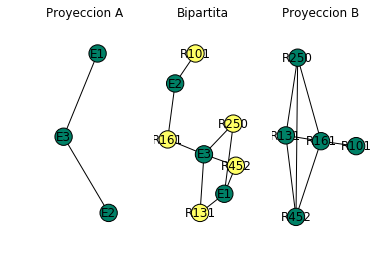

In [35]:
value =np.zeros(len(B.nodes()))
i = 0
for node in B.nodes():
    if  any(node == a for a in B1.nodes()):
        value[i] = 0.25
    if  any(node == a for a in B2.nodes()):
        value[i] = 0.75   
    i += 1


fig, ax = plt.subplots(1, 3, num=1)
plt.sca(ax[1])
ax[1].set_title('Bipartita')
nx.draw(B,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=value)
plt.sca(ax[0])
ax[0].set_title('Proyeccion A')
nx.draw(B1,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=np.ones(len(B1.nodes()))*0.25)
plt.sca(ax[2])
nx.draw(B2,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=0.75*np.ones(len(B2.nodes())))
ax[2].set_title('Proyeccion B')

plt.show()

La proyección A representa la comunicación entre Estaciones mediante el flujo de las rutas de buses, La proyección B representa la posible interacción o "encuentros" entre las rutas de buses en función de las estaciones.


## Ejercicio - Paths

Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:

    5 Paths diferentes entre los nodos
    El camino mas corto entre los nodos
    El diámetro de la red
    Un self-avoiding path



In [36]:
Nodes = [1, 2, 3, 4, 5]
nEdges = 5

In [46]:
temp = []
for subset in itertools.combinations(Nodes, 2):
    temp.append(subset)
Edges = random.sample(temp, nEdges)

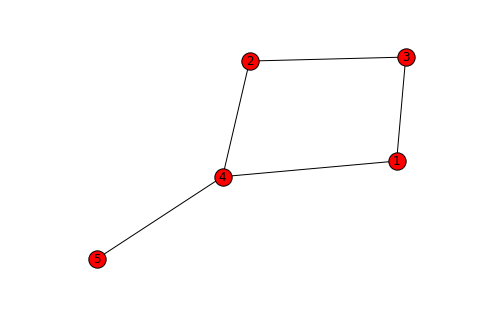

In [50]:
Edges
G = nx.Graph()
G.add_edges_from(Edges)
nx.draw(G, with_labels = True)
plt.show()

In [51]:
Grafo = {
     1 : []
   , 2 : []
   , 3 : []
   , 4 : []
   , 5 : []
    
}
for i in Edges:
    Grafo[i[0]].append(i[1])
    Grafo[i[1]].append(i[0])

In [52]:
def pathGen(Inicio, Fin):

    flag=False

    actual = Inicio
    temp = []
    cont = 0
    while not flag:
        temp.append(actual)
        actual = random.sample(Grafo[actual], 1)[0]
        if actual == Fin:
            flag = True
            temp.append(actual)
            break  
    return temp

In [54]:
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,3)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,3)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,3)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,3)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,3)

Un posible path entre el nodo 5 y 4 es:  [5, 4, 2, 4, 1, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 2, 3]
Un posible path entre el nodo 5 y 4 es:  [5, 4, 5, 4, 5, 4, 1, 3]
Un posible path entre el nodo 5 y 4 es:  [5, 4, 2, 4, 1, 3]
Un posible path entre el nodo 5 y 4 es:  [5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 2, 3]
Un posible path entre el nodo 5 y 4 es:  [5, 4, 5, 4, 2, 4, 5, 4, 5, 4, 2, 3]


In [57]:
visited = {i : False for i in xrange(1, 6)}

def shortest(a, b, length = 0):
    global visited, Grafo
    if b == a : return length
   
    minL = float('inf')
    for v in Grafo[a]:
        if not visited[v]:
            visited[v] = True
            minL = min(minL, 1 + shortest(v, b))
            visited[v] = False
    return minL

print 'El camino mas corto entre los nodos 5 y 3 es: ', shortest(5, 3)

El camino mas corto entre los nodos 5 y 3 es:  3


In [58]:
temp = []

for subset in itertools.combinations(Nodes, 2):
    temp.append(subset)

maxL = 0
for i in temp:
    maxL=max(maxL,shortest(i[0], i[1]))
print 'La diametro de la Red es, ', maxL

La diametro de la Red es,  3


In [59]:
def avoidpathGen(Inicio, Fin):

    flag=False

    actual = Inicio
    temp = []
    past = []
    cont = 0
    while not flag:
        temp.append(actual)
        past.append(actual)
        temp2 = random.sample(Grafo[actual], 1)[0]
        while not len(np.intersect1d(past,temp2)) == 0:
            temp2 = random.sample(Grafo[actual], 1)[0]
        actual = temp2
        if actual == Fin:
            flag = True
            temp.append(actual)
            break  
    return temp

In [60]:
print 'Un self-avoiding path del nodo 5 a 3 es: ', avoidpathGen(5,3)

Un self-avoiding path del nodo 5 a 3 es:  [5, 4, 1, 3]



## Ejercicio - Componentes
Baje una red real (http://snap.stanford.edu/data/index.html) y lea el archivo


 Social circles from Facebook (anonymized) - Undirected http://snap.stanford.edu/data/egonets-Facebook.html

In [71]:
F = open("youtube.txt",'r')
Net1=nx.read_edgelist(F)
F.close()

In [73]:
print 'La red tiene: ',nx.number_connected_components(Net1), ' componentes'

La red tiene: 

 1  componentes




Implemente el algorithmo Breadth First para encontrar el número de componentes (revise que el resultado es el mismo que utilizando la librería)


In [66]:
Edges = Net1.edges()

In [67]:
len(Edges)

183831

In [240]:
def netgen(nn, ne):
    nod = [i for i in range(nn)]
    nEdges = ne
    temp = []
    for subset in itertools.combinations(nod, 2):
        temp.append(subset)
    edg = random.sample(temp, nEdges)
    return edg, nod

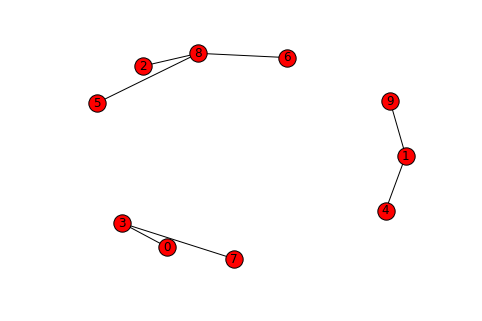

In [280]:
G = nx.Graph()
edges, nodes = netgen(10, 7)

G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()

In [281]:
nx.number_connected_components(G)

3

In [340]:
def componts(nod, edg):
    dgraf = {}
    for i in nod:
        dgraf[i] = []
    for i in edg:
        dgraf[i[0]].append(i[1])
        dgraf[i[1]].append(i[0])
    empty = nod[:]
    cont = -1
    Labels = {}
    for i in nod:
        Labels[i] = -1
        
    while (len(empty) is not 0):
        cont += 1
        temp = random.sample(empty, 1)
        if Labels[temp[0]] is -1:
            value = cont
        else:
            value = Labels[temp[0]]
        Labels[temp[0]] = value
        empty.remove(temp[0])
        
        for i in dgraf[temp[0]]:
            Labels[i] = value
            if not any_in(dgraf[i], empty):
                if i in empty:
                    empty.remove(i)
            print empty
                
        
    return Labels, cont

In [354]:
Lab, comp = componts(nodes, edges)
for i in range(10):
    print i, Lab[i]
print comp
print edges

[1, 2, 4, 5, 6, 7, 8, 9]
[1, 2, 4, 5, 6, 8, 9]
[1, 2, 4, 5, 8, 9]
[1, 2, 5, 8, 9]
[1, 5, 9]
[1, 9]
[1, 9]
[9]
[]
0 0
1 2
2 1
3 0
4 2
5 1
6 1
7 0
8 1
9 2
4
[(2, 8), (1, 4), (0, 3), (1, 9), (5, 8), (6, 8), (3, 7)]


0 7
1 2
2 14
3 3
4 13
5 13
6 11
7 9
8 3
9 0
10 4
11 8
12 3
13 5
14 3
15 4
16 1
17 10
18 6
19 12


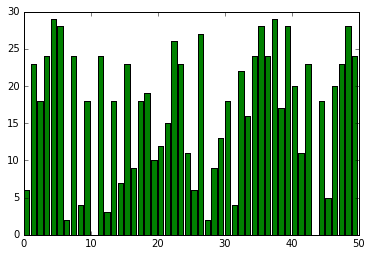

In [158]:
plt.bar(Lab.keys(), Lab.values(), color='g')
plt.show()

In [226]:
any_in([1,2],[2,3,4,5,6,7])

True

In [225]:
any_in = lambda a, b: any(i in b for i in a)